# ***Modeling-***

In [55]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
accepted_data = pd.read_csv("final_cleaned_accepted.csv")

In [58]:
# printing the shape of the data (rows,columns)
accepted_data.shape

(2011813, 92)

In [59]:
# print the first five rows of the DataFrame
accepted_data.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,deling_2yrs,fico_range_low,fico_range_high,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,earliest_cr_line_year,earliest_cr_line_month,issue_d_year,issue_d_month,last_credit_pull_d_year,last_credit_pull_d_month,last_pymnt_d_year,last_pymnt_d_month
0,0,3600.0,3600.0,3600.0,36,13.99,123.03,C,10,1,55000.0,0,5,0,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,1,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,0,0.0,722.0,144904.0,4981.0,722.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.000000,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,0,0,0,2003,8,2015,12,2019,3,2019,1
1,1,24700.0,24700.0,24700.0,36,11.99,820.28,C,10,1,65000.0,0,5,0,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,1,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,0,0.0,0.0,204396.0,18005.0,6472.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.000000,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,0,0,0,1999,12,2015,12,2019,3,2016,6
2,2,20000.0,20000.0,20000.0,60,10.78,432.66,B,10,1,63000.0,0,5,0,10.78,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,1,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,1,0.0,0.0,189699.0,10827.0,2081.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.000000,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,0,0,0,2000,8,2015,12,2019,3,2017,6
3,3,35000.0,35000.0,35000.0,60,14.85,829.90,C,10,1,110000.0,1,1,0,17.06,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,1,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,829.90,679.0,675.0,0.0,1.0,0,0.0,0.0,301500.0,12609.0,6987.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,7.084087,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,0,0,0,2008,9,2015,12,2019,3,2019,2
4,4,10400.0,10400.0,10400.0,60,22.45,289.91,F,3,1,104433.0,1,5,0,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,1,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,0,0.0,0.0,331730.0,73839.0,9702.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.000000,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,0,0,0,1998,6,2015,12,2018,3,2016,7


In [60]:
# print the list of columns in the dataset to find the name of the prediction target
accepted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011813 entries, 0 to 2011812
Data columns (total 92 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Unnamed: 0                  int64  
 1   loan_amnt                   float64
 2   funded_amnt                 float64
 3   funded_amnt_inv             float64
 4   term                        int64  
 5   int_rate                    float64
 6   installment                 float64
 7   grade                       object 
 8   emp_length                  int64  
 9   home_ownership              int64  
 10  annual_inc                  float64
 11  verification_status         int64  
 12  loan_status                 int64  
 13  pymnt_plan                  int64  
 14  dti                         float64
 15  deling_2yrs                 float64
 16  fico_range_low              float64
 17  fico_range_high             float64
 18  ing_last_6mths              float64
 19  open_acc             

# Selecting The Prediction Target

We can pull out a variable with dot-notation. This single column is stored in a Series, which is broadly like a DataFrame with only a single column of data.

We'll use the dot notation to select the column we want to predict, which is called the prediction target. By convention, the prediction target is called y

In [61]:
accepted_data["grade"].value_counts()

B    590586
C    578558
A    394953
D    283424
E    117537
F     36166
G     10589
Name: grade, dtype: int64

In [62]:
accepted_data['grade'] = accepted_data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [63]:
y = accepted_data['grade']

In [64]:
y

0          3
1          3
2          2
3          3
4          6
          ..
2011808    2
2011809    2
2011810    2
2011811    3
2011812    3
Name: grade, Length: 2011813, dtype: int64

# Choosing "Features"


Now we will create a DataFrame called X holding the predictive features.

Since we want only some columns from the original data, we'll first create a list with the names of the columns we want in X.

The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the grade. 

We select multiple features by providing a list of column names inside brackets.

In [65]:
# Creating the list of features below
feature_names = ['funded_amnt_inv','int_rate','emp_length', 'annual_inc', 'pymnt_plan', 'dti', 'deling_2yrs', 'fico_range_low', 'ing_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'total_rec_late_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_dealing', 'tot_coll_amt', 'tot_cur_bal', 'total_bal_il', 'max_bal_bc', 'issue_d_month', 'earliest_cr_line_month', 'earliest_cr_line_year', 'last_pymnt_d_month','last_credit_pull_d_month', 'last_credit_pull_d_year']

By convention, this data is called X.

In [66]:
# Select data corresponding to features in feature_names
X = accepted_data[feature_names]

In [67]:
# printing the shape of the data (rows,columns)
X.shape

(2011813, 33)

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011813 entries, 0 to 2011812
Data columns (total 33 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   funded_amnt_inv             float64
 1   int_rate                    float64
 2   emp_length                  int64  
 3   annual_inc                  float64
 4   pymnt_plan                  int64  
 5   dti                         float64
 6   deling_2yrs                 float64
 7   fico_range_low              float64
 8   ing_last_6mths              float64
 9   open_acc                    float64
 10  pub_rec                     float64
 11  revol_bal                   float64
 12  revol_util                  float64
 13  total_acc                   float64
 14  initial_list_status         int64  
 15  total_rec_late_fee          float64
 16  last_pymnt_amnt             float64
 17  last_fico_range_high        float64
 18  last_fico_range_low         float64
 19  collections_12_mths_e

Let's quickly review the data we'll be using to predict grade using the describe method and the head method, which shows the top few rows.

In [69]:
X.describe()

,funded_amnt_inv,int_rate,emp_length,annual_inc,pymnt_plan,dti,deling_2yrs,fico_range_low,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_late_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,issue_d_month,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_credit_pull_d_month,last_credit_pull_d_year
count,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2011813.0,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06,2.011813e+06
mean,1.524292e+04,1.303905e+01,6.211924e+00,7.886847e+04,2.713970e-04,1.922425e+01,3.085814e-01,6.989068e+02,5.429675e-01,1.184194e+01,1.998128e-01,1.658321e+04,4.994625e+01,2.464468e+01,7.015970e-01,1.501758e+00,3.497902e+03,6.889226e+02,6.773720e+02,1.718699e-02,1.0,5.569106e-02,4.302587e-03,2.397015e+02,1.447505e+05,3.679309e+04,5.819536e+03,6.765297e+00,6.739750e+00,1.999548e+03,4.998735e+00,4.307000e+00,2.018461e+03
std,9.218408e+03,4.854674e+00,3.732877e+00,1.088075e+05,1.647190e-02,1.442853e+01,8.673368e-01,3.309607e+01,8.378096e-01,5.632920e+00,5.782347e-01,2.200594e+04,2.449972e+01,1.192246e+01,4.575574e-01,1.182641e+01,6.091766e+03,7.227845e+01,1.085009e+02,1.432625e-01,0.0,2.293242e-01,7.092019e-02,8.858000e+03,1.593913e+05,3.549477e+04,4.467919e+03,3.412506e+00,3.376731e+00,7.767315e+00,3.214543e+00,2.872079e+00,9.520098e-01
min,7.250000e+02,5.310000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.600000e+02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,-9.500000e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.933000e+03,1.000000e+00,1.000000e+00,2.012000e+03
25%,8.000000e+03,9.440000e+00,3.000000e+00,4.800000e+04,0.000000e+00,1.233000e+01,0.000000e+00,6.750000e+02,0.000000e+00,8.000000e+00,0.000000e+00,6.107000e+03,3.120000e+01,1.600000e+01,0.000000e+00,0.000000e+00,3.140600e+02,6.590000e+02,6.550000e+02,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,3.086100e+04,1.777000e+04,3.500000e+03,4.000000e+00,4.000000e+00,1.996000e+03,3.000000e+00,3.000000e+00,2.018000e+03
50%,1.312500e+04,1.262000e+01,7.000000e+00,6.580000e+04,0.000000e+00,1.819000e+01,0.000000e+00,6.900000e+02,0.000000e+00,1.100000e+01,0.000000e+00,1.149600e+04,4.980000e+01,2.300000e+01,1.000000e+00,0.000000e+00,6.090800e+02,6.990000e+02,6.950000e+02,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,8.323000e+04,3.679309e+04,5.819536e+03,7.000000e+00,7.000000e+00,2.001000e+03,3.000000e+00,3.000000e+00,2.019000e+03
75%,2.000000e+04,1.588000e+01,1.000000e+01,9.500000e+04,0.000000e+00,2.482000e+01,0.000000e+00,7.150000e+02,1.000000e+00,1.500000e+01,0.000000e+00,2.039800e+04,6.870000e+01,3.100000e+01,1.000000e+00,0.000000e+00,3.900520e+03,7.340000e+02,7.300000e+02,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,2.160970e+05,3.679309e+04,5.819536e+03,1.000000e+01,1.000000e+01,2.005000e+03,7.000000e+00,4.000000e+00,2.019000e+03
max,4.000000e+04,3.099000e+01,1.000000e+01,1.100000e+08,1.000000e+00,9.990000e+02,5.800000e+01,8.450000e+02,8.000000e+00,1.010000e+02,8.600000e+01,2.904836e+06,3.666000e+02,1.760000e+02,1.000000e+00,1.484340e+03,4.219205e+04,8.500000e+02,8.450000e+02,2.000000e+01,1.0,1.000000e+00,1.400000e+01,9.152545e+06,9.971659e+06,1.837038e+06,1.170668e+06,1.200000e+01,1.200000e+01,2.015000e+03,1.200000e+01,1.200000e+01,2.019000e+03


In [70]:
# print the first five rows of the X DataFrame
X.head()

,funded_amnt_inv,int_rate,emp_length,annual_inc,pymnt_plan,dti,deling_2yrs,fico_range_low,ing_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_late_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_dealing,tot_coll_amt,tot_cur_bal,total_bal_il,max_bal_bc,issue_d_month,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,13.99,10,55000.0,0,5.91,0.0,675.0,1.0,7.0,0.0,2765.0,29.7,13.0,1,0.0,122.67,564.0,560.0,0.0,1.0,0,0.0,722.0,144904.0,4981.0,722.0,12,8,2003,1,3,2019
1,24700.0,11.99,10,65000.0,0,16.06,1.0,715.0,4.0,22.0,0.0,21470.0,19.2,38.0,1,0.0,926.35,699.0,695.0,0.0,1.0,0,0.0,0.0,204396.0,18005.0,6472.0,12,12,1999,6,3,2019
2,20000.0,10.78,10,63000.0,0,10.78,0.0,695.0,0.0,6.0,0.0,7869.0,56.2,18.0,1,0.0,15813.30,704.0,700.0,0.0,1.0,1,0.0,0.0,189699.0,10827.0,2081.0,12,8,2000,6,3,2019
3,35000.0,14.85,10,110000.0,0,17.06,0.0,785.0,0.0,13.0,0.0,7802.0,11.6,17.0,1,0.0,829.90,679.0,675.0,0.0,1.0,0,0.0,0.0,301500.0,12609.0,6987.0,12,9,2008,2,3,2019
4,10400.0,22.45,3,104433.0,0,25.37,1.0,695.0,3.0,12.0,0.0,21929.0,64.5,35.0,1,0.0,10128.96,704.0,700.0,0.0,1.0,0,0.0,0.0,331730.0,73839.0,9702.0,12,6,1998,7,3,2018


# ***Logistic Regression-***

# MODEL VALIDATION

# Splitting our Data 

In [71]:
from sklearn.model_selection import train_test_split
# split data into training and validation data, for both features and target
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.2, random_state=1)

In [72]:
print( train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(1609450, 33) (402363, 33) (1609450,) (402363,)


# FEATURE SCALING 


Standardisation

In [73]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.fit_transform(test_X)

# Specify and Fit the Model

In [74]:
from sklearn.linear_model import LogisticRegression

# Defining model
accepted_model = LogisticRegression(penalty='none')

In [75]:
# Fitting model
accepted_model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Make Predictions with Validation data

In [76]:
val_predictions = accepted_model.predict(test_X)

In [77]:
print("length is :", len(val_predictions))

length is : 402363


In [78]:
val_predictions

array([3, 3, 1, ..., 7, 1, 4])

In [80]:
# Comparing Actual Data vs Predicted Data
compare_grades = pd.DataFrame({'Actual':test_y, 'Predicted':val_predictions})
compare_grades

,Actual,Predicted
2001991,3,3
1187606,3,3
274570,1,1
1114314,2,2
1747536,3,3
...,...,...
352134,1,1
75784,2,2
1114297,7,7
1385065,1,1


# MODEL EVALUATION

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  r2_score,mean_squared_error, mean_absolute_error

In [82]:
confusion = confusion_matrix(test_y, val_predictions)
print(" \n Confusion Matrix is : \n", confusion)

 
 Confusion Matrix is : 
 [[ 75164   4130      0      0      0      0      0]
 [  5790 104748   7634      0      0      0      0]
 [    40   6797 103943   4557      0      0      0]
 [    27      0   6241  46520   3971      1      0]
 [     8      0      1   7646  14261   1472      0]
 [     6      0      0     13   3353   3380    534]
 [     1      0      0      0    108   1320    697]]


Text(0.5, 257.44, 'Predicted label')

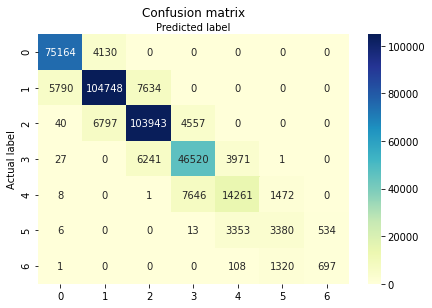

In [83]:
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [84]:
accuracy = accuracy_score(test_y, val_predictions)

In [85]:
r2 = r2_score(test_y,val_predictions)

In [86]:
report = classification_report(test_y, val_predictions)

In [87]:
MSE = mean_squared_error(test_y, val_predictions)

In [88]:
RMSE = np.sqrt(mean_squared_error(test_y, val_predictions))

In [89]:
MAE = np.sqrt(mean_absolute_error(test_y, val_predictions))

In [90]:
print(" Accuracy Score is : ", accuracy)

print(" \n R2 score is :-", r2)

print(" \n Classification Report is : \n", report)

print(" \n Mean Squared Error is : ", MSE)

print(" \n Root Mean Squared Error is : ", RMSE)

print(" \n Mean Absolute Error is : ", MAE)   

 Accuracy Score is :  0.8666626901578922
 
 R2 score is :- 0.913866383227933
 
 Classification Report is : 
               precision    recall  f1-score   support

           1       0.93      0.95      0.94     79294
           2       0.91      0.89      0.90    118172
           3       0.88      0.90      0.89    115337
           4       0.79      0.82      0.81     56760
           5       0.66      0.61      0.63     23388
           6       0.55      0.46      0.50      7286
           7       0.57      0.33      0.42      2126

    accuracy                           0.87    402363
   macro avg       0.75      0.71      0.73    402363
weighted avg       0.86      0.87      0.87    402363

 
 Mean Squared Error is :  0.13583256909805325
 
 Root Mean Squared Error is :  0.36855470299272164
 
 Mean Absolute Error is :  0.36607150353146894


Small value of Mean Absolute Error states that the probability of wrong prediction is very low

In [91]:
grade=accepted_data['grade'].unique()
len(grade)

7

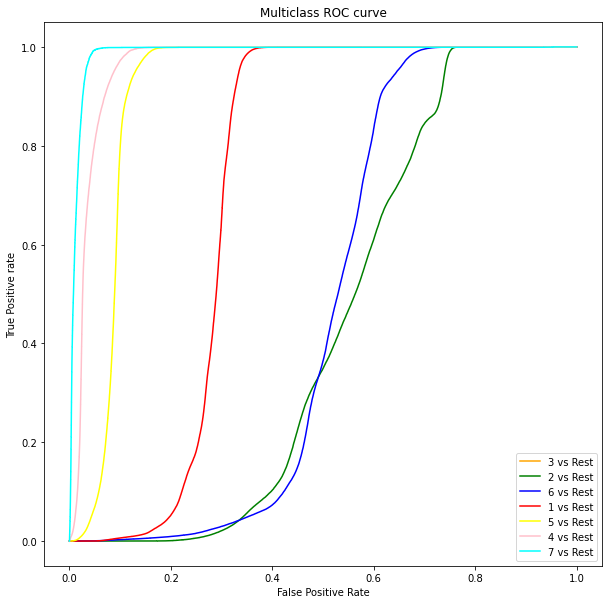

In [94]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Get class probability scores
grade_prob = accepted_model.predict_proba(test_X)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(grade)):
  fpr[i], tpr[i], thresh[i] = roc_curve(test_y, grade_prob[:,i], pos_label=i) 

# Plot the ROC chart
plt.figure(figsize=(10,10))
plt.plot(fpr[0], tpr[0],color='orange', label=str(grade[0]) + ' vs Rest')
plt.plot(fpr[1], tpr[1],color='green', label=str(grade[1]) + ' vs Rest')
plt.plot(fpr[2], tpr[2],color='blue', label=str(grade[2]) + ' vs Rest')
plt.plot(fpr[3], tpr[3],color='red', label=str(grade[3]) + ' vs Rest')
plt.plot(fpr[4], tpr[4],color='yellow', label=str(grade[4]) + ' vs Rest')
plt.plot(fpr[5], tpr[5],color='pink', label=str(grade[5]) + ' vs Rest')
plt.plot(fpr[6], tpr[6],color='cyan', label=str(grade[6]) + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


In [96]:
roc_auc = roc_auc_score(test_y, grade_prob, multi_class=('ovr'))
print(" \n AUC using ROC is : ", roc_auc)

 
 AUC using ROC is :  0.9865396293036989


# ***Neural Networks-***

In [97]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras

In [100]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 33))
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
classifier.fit(train_X, train_y, batch_size =128 , epochs = 10, validation_split=0.2)

Epoch 1/10
10060/10060 [==============================] - 33s 2ms/step - loss: 0.5303 - accuracy: 0.1871 - val_loss: 0.1232 - val_accuracy: 0.1961
Epoch 2/10
10060/10060 [==============================] - 17s 2ms/step - loss: 0.1174 - accuracy: 0.1967 - val_loss: 0.1109 - val_accuracy: 0.1961
Epoch 3/10
10060/10060 [==============================] - 16s 2ms/step - loss: 0.1096 - accuracy: 0.1962 - val_loss: 0.1076 - val_accuracy: 0.1961
Epoch 4/10
10060/10060 [==============================] - 17s 2ms/step - loss: 0.1046 - accuracy: 0.1961 - val_loss: 0.1045 - val_accuracy: 0.1961
Epoch 5/10
10060/10060 [==============================] - 17s 2ms/step - loss: 0.1023 - accuracy: 0.1954 - val_loss: 0.0952 - val_accuracy: 0.1961
Epoch 6/10
10060/10060 [==============================] - 17s 2ms/step - loss: 0.0955 - accuracy: 0.1963 - val_loss: 0.0950 - val_accuracy: 0.1961
Epoch 7/10
10060/10060 [==============================] - 17s 2ms/step - loss: 0.0898 - accuracy: 0.1961 - val_loss: 0

In [101]:
val_predictions = classifier.predict(test_X)

In [102]:
val_predictions=val_predictions.round().astype(int)

In [103]:
compare_grades = pd.DataFrame({'Actual':test_y.tolist(), 'Predicted':val_predictions.tolist()})
compare_grades

,Actual,Predicted
0,3,[3]
1,3,[4]
2,1,[1]
3,2,[2]
4,3,[3]
...,...,...
402358,1,[1]
402359,2,[2]
402360,7,[6]
402361,1,[1]


In [105]:
from sklearn import metrics
print(" The accuracy of Neural Networks is :", metrics.accuracy_score(val_predictions,test_y))

 The accuracy of Neural Networks is : 0.8953034946056173
